## Supervised Learning Models - California Test Score Project

Data: [the California Test Score Data Set](https://vincentarelbundock.github.io/Rdatasets/datasets.html)

Goal: using different regression models to predict the test score.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Caschool.csv', index_col=0)

In [3]:
df.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 1 to 420
Data columns (total 17 columns):
distcod     420 non-null int64
county      420 non-null object
district    420 non-null object
grspan      420 non-null object
enrltot     420 non-null int64
teachers    420 non-null float64
calwpct     420 non-null float64
mealpct     420 non-null float64
computer    420 non-null int64
testscr     420 non-null float64
compstu     420 non-null float64
expnstu     420 non-null float64
str         420 non-null float64
avginc      420 non-null float64
elpct       420 non-null float64
readscr     420 non-null float64
mathscr     420 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 59.1+ KB


Text(0.5, 1.0, 'Average Test Score Distribustion')

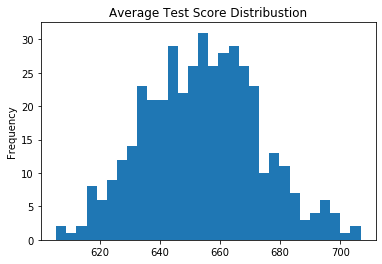

In [5]:
# Visualize the univariate distribution of the target feature and other explanatory variables

# distribution of the target feature - testscr
df['testscr'].plot.hist(bins=30)
plt.title('Average Test Score Distribustion')

Text(0.5, 1.0, 'Percent Qualifying for Reduced-price Lunch Distribustion')

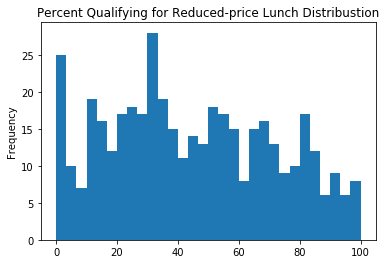

In [6]:
# distribution of mealpct: percent qualifying for reduced-price lunch
df['mealpct'].plot.hist(bins=30)
plt.title('Percent Qualifying for Reduced-price Lunch Distribustion')

Text(0.5, 1.0, 'District Average Income Distribustion')

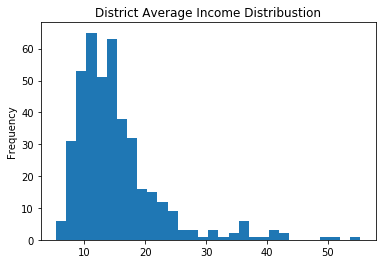

In [7]:
# distribution of avginc: district average income
df['avginc'].plot.hist(bins=30)
plt.title('District Average Income Distribustion')

Text(0.5, 1.0, 'Percent of English Learners Distribustion')

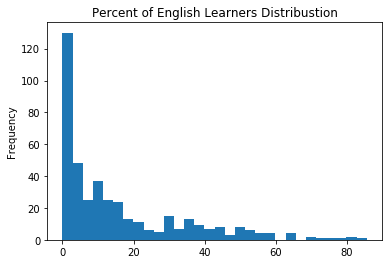

In [8]:
# distribution of elpct: percent of English learners
df['elpct'].plot.hist(bins=30)
plt.title('Percent of English Learners Distribustion')

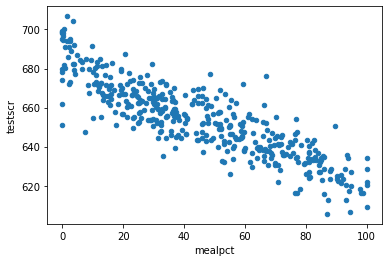

In [9]:
# Visualize the dependency of the target on each feature

# percent qualifying for reduced-price lunch v.s. average test score
df.plot.scatter(x='mealpct', y='testscr')

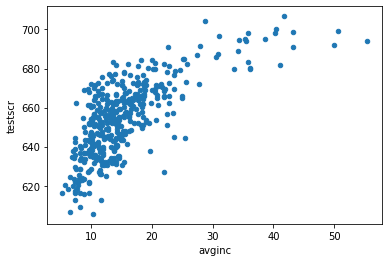

In [10]:
# district average income v.s. average test score
df.plot.scatter(x='avginc', y='testscr')

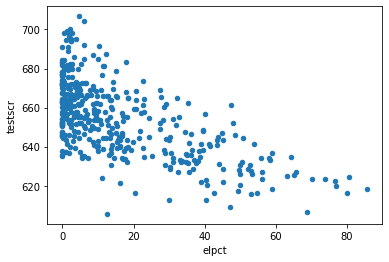

In [11]:
# percent of English learners v.s. average test score
df.plot.scatter(x='elpct', y='testscr')

In [12]:
# Split data in training and test set.

# Delete extra variable that is not continuous
df.drop(['county', 'district', 'grspan'], axis=1, inplace=True)

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop(['testscr', 'readscr', 'mathscr'], axis=1)
y = df['testscr']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Build models that evaluate the relationship in the California test dataset and the target variable.

# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

knn_pred = knn.predict(X_test)

accuracy: 0.22


In [15]:
# Linear Regression (OLS)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(lr.score(X_test, y_test)))

lr_pred = lr.predict(X_test)

accuracy: 0.80


In [16]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(ridge.score(X_test, y_test)))

ridge_pred = ridge.predict(X_test)

accuracy: 0.80


In [17]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print("accuracy: {:.2f}".format(lasso.score(X_test, y_test)))

lasso_pred = lasso.predict(X_test)

accuracy: 0.80


/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.53876346228208, tolerance: 10.135477633342425
  positive)


In [18]:
# Evaluate models using cross-validation.

#import cross validation function from sk learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Set up function parameters for diff't cross validation strategies
skfold = StratifiedKFold()
kfold = KFold()

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [19]:
# KNN for regression using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kfold))))

cross-validation score: -0.14


In [20]:
# Linear Regression (OLS) using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=kfold))))

cross-validation score: 0.77


In [21]:
# Ridge Regression using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(Ridge(), X_train, y_train, cv=kfold))))

cross-validation score: 0.77


In [22]:
# Lasso Regression using cross-validation
print("cross-validation score: {:.2f}".format(np.mean(cross_val_score(Lasso(), X_train, y_train, cv=kfold))))

cross-validation score: 0.78


/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.63531307454832, tolerance: 6.835283604888848
  positive)
/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3475.001547921963, tolerance: 6.7078127114330615
  positive)


In [23]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_feature = pd.DataFrame(X_train_scaled, columns=['distcod', 'enrltot', 'teachers', 'calwpct', 'mealpct',
                                                   'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct'])
df_feature.head()

,distcod,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,-1.699007,-0.599115,-0.600282,2.108420,1.226320,-0.490538,3.304648,2.903088,-1.282144,-0.895483,-0.876242
1,-0.769461,0.990644,0.845267,0.747233,1.892923,1.390596,0.054892,-0.403927,1.620545,-1.167449,3.495146
2,0.673452,-0.623547,-0.635742,-0.257150,-1.291636,-0.578683,2.721380,1.212299,0.372576,0.649412,-0.876242
3,1.359464,-0.484141,-0.484650,1.162828,1.453531,-0.576533,-1.139764,-1.007993,-0.131125,-0.992673,1.220132
4,0.328731,-0.583785,-0.591030,-0.663400,-0.573332,-0.595882,-0.289328,-0.966324,-0.189911,-0.116848,-0.450952


In [24]:
# KNN Regression with scaled data
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

# Compare to the score of non-scaled data 0.22, scaling helps a lot.

accuracy: 0.75


In [25]:
# Linear Regression (OLS) with scaled data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(lr.score(X_test_scaled, y_test)))

# Compare to the score of non-scaled data 0.80, scaling does not help.

accuracy: 0.80


In [26]:
# Ridge Regression with scaled data
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

# Compare to the score of non-scaled data 0.80, scaling does not help.

accuracy: 0.80


In [27]:
# Lasso Regression with scaled data
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
print("accuracy: {:.2f}".format(lasso.score(X_test_scaled, y_test)))

# Compare to the score of non-scaled data 0.80, scaling does not help at all.

accuracy: 0.79


In [28]:
# Tune the parameters of the models using GridSearchCV. 

from sklearn.model_selection import GridSearchCV

In [29]:
# Tuning parameters for KNN Model
knn_params = {'n_neighbors': np.arange(1, 15, 2)}
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params) 

#use meta model methods to fit score and predict model:
knn_grid.fit(X_train_scaled, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(knn_grid.best_score_))
print("best parameters: {}".format(knn_grid.best_params_))
print("test-set score: {:.2f}".format(knn_grid.score(X_test_scaled, y_test)))

# Compared to 0.75 of KNN model with scaled data, gridsearch does not improve the result.

best mean cross-validation score: 0.69
best parameters: {'n_neighbors': 9}
test-set score: 0.74


/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [30]:
# Tuning parameters for Linear Regression Model
ln_params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs': [1, 5, 10, 50, 100, 500]} 
ln_grid = GridSearchCV(LinearRegression(), param_grid=ln_params)
ln_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(ln_grid.best_score_))
print("best parameters: {}".format(ln_grid.best_params_))
print("test-set score: {:.2f}".format(ln_grid.score(X_test, y_test)))

# Compare to 0.80, gridsearch does not improve the result.

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best mean cross-validation score: 0.77
best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
test-set score: 0.80


In [31]:
# Tuning parameters for Ridge Regression Model
ridge_params = {'alpha':[1, 10, 100, 500, 1000, 5000], 'tol': [1, 0.1, 0.01, 0.001, 0.0001]}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params)
ridge_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(ridge_grid.best_score_))
print("best parameters: {}".format(ridge_grid.best_params_))
print("test-set score: {:.2f}".format(ridge_grid.score(X_test, y_test)))

# Compare to 0.80, gridsearch does not improve the result.

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best mean cross-validation score: 0.78
best parameters: {'alpha': 1000, 'tol': 1}
test-set score: 0.80


In [32]:
# Tuning parameters for Lasso Regression Model
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.1, 1, 10], 'max_iter': [1000, 2000, 5000, 10000]}
lasso_grid = GridSearchCV(Lasso(tol=1), param_grid=lasso_params) # set tol=1 to silence warnings
lasso_grid.fit(X_train, y_train)
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(lasso_grid.best_score_))
print("best parameters: {}".format(lasso_grid.best_params_))
print("test-set score: {:.2f}".format(lasso_grid.score(X_test, y_test)))

# Compare to 0.80, gridsearch does not help.

/Users/fanyaweng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best mean cross-validation score: 0.77
best parameters: {'alpha': 0.05, 'max_iter': 1000}
test-set score: 0.79


In [33]:
# Compare the coefficients of the two best linear models

# the coefficients of Ridge model
coeff_df = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefficient'])  
coeff_df
# The Ridge model's top three most important features are: mealpct, avginc, elpct

,Coefficient
distcod,-0.595212
enrltot,0.046076
teachers,-1.000880
calwpct,-1.387450
mealpct,-9.590066
computer,1.035029
compstu,-0.123832
expnstu,1.191139
str,-0.669891
avginc,3.756291


In [34]:
# the coefficients of Lasso model
coeff_df = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefficient'])  
coeff_df
# The Lasso model's top three most important features are: mealpct, avginc, elpct

# The Ridge and Lasso models agree on the top three most important features

,Coefficient
distcod,-0.000000
enrltot,-0.000000
teachers,-0.000000
calwpct,-0.000000
mealpct,-10.639949
computer,-0.000000
compstu,0.000000
expnstu,0.458522
str,-0.227043
avginc,3.323638


In [35]:
# The selected features from Both Ridge and Lasso models agree with my inial selection of features 
# that shows a high relationship with the target value regarding the visualization result.
# While the Lasso method overcomes the disadvantage of Ridge regression by not only punishing high 
# values of the coefficients β but actually setting them to zero if they are not relevant.
# Therefore, I would choose Lasso model to predict new data.